@Juanpi I think we might need to downsample (to daily instead of hourly)
I should probably do the first of these steps still in the feature engineering part!

In [96]:
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

# Load data

In [97]:
import pandas as pd

data = pd.read_csv("final_data.csv")

In [98]:
data.head()

,Unnamed: 0,time,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,winter,spring,summer,autumn
0,0,2014-12-31 23:00:00+00:00,-2.233317,-2.130880,-2.265961,-3.823679,0.127783,-0.764581,1.11551,-0.275725,...,-0.849569,0.360456,-0.575179,-0.735053,-0.045555,65.41,0,0,0,1
1,1,2015-01-01 00:00:00+00:00,-2.233317,-2.130880,-2.265961,-3.823679,0.127783,-0.764581,1.11551,-0.275725,...,-0.850169,0.165771,-0.832657,-0.954022,-0.197105,64.92,1,0,0,0
2,2,2015-01-01 01:00:00+00:00,-2.356082,-2.255406,-2.384259,-3.823679,0.167430,-0.764581,0.81959,-0.275725,...,-0.854963,0.030833,-1.141240,-1.313802,-0.255452,64.48,1,0,0,0
3,3,2015-01-01 02:00:00+00:00,-2.356082,-2.255406,-2.384259,-3.823679,0.167430,-0.764581,0.81959,-0.275725,...,-0.858559,-0.070873,-1.331087,-1.629920,-0.638874,59.32,1,0,0,0
4,4,2015-01-01 03:00:00+00:00,-2.356082,-2.255406,-2.384259,-3.823679,0.167430,-0.764581,0.81959,-0.275725,...,-0.854364,-0.168216,-1.517454,-1.853037,-0.931366,56.04,1,0,0,0


# Downsample data to daily instead of hourly

In [99]:
data['time'] = pd.to_datetime(data['time'])

# Convert the 'datetime' column to daily periods
data['date'] = data['time'].dt.to_period('D').dt.start_time

# Group by the new 'date' column, calculate the mean for daily values, and reset the index
data = data.groupby('date').mean().reset_index(drop=False)

#Drop column time
data = data.drop(columns='time')

#Set new date column as index
data.set_index('date', inplace=True)

C:\Users\hanten carlotta\AppData\Local\Temp\ipykernel_25996\3035059401.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['date'] = data['time'].dt.to_period('D').dt.start_time


In [100]:
data.head(20)

,Unnamed: 0,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,winter,spring,summer,autumn
date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,0.0,-2.233317,-2.130880,-2.265961,-3.823679,0.127783,-0.764581,1.115510,-0.275725,-0.034384,...,-0.849569,0.360456,-0.575179,-0.735053,-0.045555,65.410000,0.0,0.0,0.0,1.0
2015-01-01,12.5,-1.710394,-1.600454,-1.762063,-2.333487,0.111264,-0.839285,0.501065,-0.275725,-0.034384,...,-0.230769,-0.476552,-0.871964,-1.044631,-0.303147,62.090833,1.0,0.0,0.0,0.0
2015-01-02,36.5,-1.670539,-1.560028,-1.723659,-2.014160,0.190557,-0.764581,0.377423,-0.275725,-0.034384,...,-0.148238,1.931717,-0.270419,-0.341316,-0.181819,69.443750,1.0,0.0,0.0,0.0
2015-01-03,60.5,-1.540379,-1.428000,-1.598235,-2.961496,0.256635,-0.789482,-0.237707,-0.275725,-0.034384,...,-0.180501,1.259170,-0.709391,-0.797764,-1.800494,65.223333,1.0,0.0,0.0,0.0
2015-01-04,84.5,-1.455313,-1.341713,-1.516264,-3.550477,0.302889,-0.789482,-0.606237,-0.275725,-0.034384,...,0.405804,0.893100,-0.346867,-0.359572,-1.518749,58.912083,1.0,0.0,0.0,0.0
2015-01-05,108.5,-1.480191,-1.366948,-1.540236,-3.412102,0.403657,-0.714778,-0.344567,-0.275725,-0.034384,...,0.184810,0.754023,-1.392340,-1.331568,-0.870935,74.598333,1.0,0.0,0.0,0.0
2015-01-06,132.5,-1.711768,-1.601848,-1.763388,-4.235255,0.727437,-0.864186,0.562373,-0.275725,-0.034384,...,0.505722,-0.915643,-0.285841,-0.145325,0.405370,68.678750,1.0,0.0,0.0,0.0
2015-01-07,156.5,-1.679543,-1.569161,-1.732336,-2.535727,0.453215,-0.764581,0.269878,-0.275725,-0.034384,...,0.480201,0.140246,0.788463,0.698084,0.630927,74.180040,1.0,0.0,0.0,0.0
2015-01-08,180.5,-1.666108,-1.555533,-1.719389,-3.298563,0.355751,-0.764581,-0.121600,-0.275725,-0.034384,...,0.489541,-0.605643,-0.325891,-0.526227,0.246021,78.559167,1.0,0.0,0.0,0.0


# Create lags

In [101]:
data["price(t-1)"] = data["price actual"].shift(1)
data["price(t-2)"] = data["price actual"].shift(2)
data["price(t-3)"] = data["price actual"].shift(3)
data["price(t-4)"] = data["price actual"].shift(4)
data["price(t-5)"] = data["price actual"].shift(5)
data["price(t-6)"] = data["price actual"].shift(6)
data["price(t-7)"] = data["price actual"].shift(7)
data["price(t-8)"] = data["price actual"].shift(8)
data["price(t-9)"] = data["price actual"].shift(9)
data["price(t-10)"] = data["price actual"].shift(10)
data["price(t-11)"] = data["price actual"].shift(11)
data["price(t-12)"] = data["price actual"].shift(12)

In [102]:
#Drop the first 12 rows as they have null values in the lags
data = data.iloc[12:]

In [103]:
data.tail(20)

,Unnamed: 0,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,price(t-3),price(t-4),price(t-5),price(t-6),price(t-7),price(t-8),price(t-9),price(t-10),price(t-11),price(t-12)
date,,,,,,,,,,,,,,,,,,,,,
2018-12-12,35752.0,-1.053810,-1.099043,-0.990899,0.417531,1.473207,-0.417568,0.305708,-0.275725,-0.034384,...,63.642222,63.099063,66.474400,65.763077,68.137500,72.166207,69.731053,61.335161,64.667083,67.697857
2018-12-13,35782.5,-0.768479,-0.736023,-0.802386,-0.468618,1.003972,0.813338,0.435990,0.490041,-0.034384,...,67.676250,63.642222,63.099063,66.474400,65.763077,68.137500,72.166207,69.731053,61.335161,64.667083
2018-12-14,35809.5,-1.064235,-1.079499,-1.029149,0.434013,0.684487,0.355980,0.277070,-0.275725,-0.034384,...,70.072083,67.676250,63.642222,63.099063,66.474400,65.763077,68.137500,72.166207,69.731053,61.335161
2018-12-15,35834.5,-1.059316,-1.044107,-1.045793,0.823755,1.173842,-0.258892,0.126897,-0.111703,-0.034384,...,70.551290,70.072083,67.676250,63.642222,63.099063,66.474400,65.763077,68.137500,72.166207,69.731053
2018-12-16,35863.0,-0.655745,-0.633513,-0.689367,0.480710,1.085695,0.976749,0.285821,0.274542,-0.034384,...,65.982667,70.551290,70.072083,67.676250,63.642222,63.099063,66.474400,65.763077,68.137500,72.166207
2018-12-17,35890.5,-1.143770,-1.175162,-1.059442,1.047830,0.618409,-0.664975,-0.396970,-0.275725,-0.034384,...,67.641250,65.982667,70.551290,70.072083,67.676250,63.642222,63.099063,66.474400,65.763077,68.137500
2018-12-18,35914.5,-1.215041,-1.211605,-1.193596,0.685926,0.947145,-0.664975,-0.230515,-0.275725,-0.034384,...,64.608846,67.641250,65.982667,70.551290,70.072083,67.676250,63.642222,63.099063,66.474400,65.763077
2018-12-19,35940.0,-0.908409,-0.858310,-0.926250,0.594859,1.343610,0.010128,0.255455,-0.117778,-0.034384,...,61.044516,64.608846,67.641250,65.982667,70.551290,70.072083,67.676250,63.642222,63.099063,66.474400
2018-12-20,35966.5,-0.814318,-0.808629,-0.822093,0.938385,1.308030,-0.396807,0.158196,-0.275725,-0.034384,...,69.334583,61.044516,64.608846,67.641250,65.982667,70.551290,70.072083,67.676250,63.642222,63.099063


# Flexible functions (user can speficy date after which to predict)

Function to train model and save it to a file

In [104]:

def train_and_save_model(data, initial_date, model_filename):
    #Turn inpute date into datetime 
    initial_date = pd.to_datetime(initial_date)
    
    # Filter data up to the initial date for training
    train = data[data.index < initial_date]

    # Define features and target
    X_train = train.drop(columns=["price actual", "Unnamed: 0"])
    y_train = train["price actual"]

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")

In [105]:
train_and_save_model(data=data, initial_date="2017-12-31", model_filename="trained_RFR")

Model saved to trained_RFR


Function to make predictions

In [106]:
# Function to make predictions with the trained model
def make_predictions(data, initial_date):
    # Load the trained model
    model = joblib.load("trained_RFR")

    # Filter data from the initial date for predictions
    test = data[data.index >= initial_date]

    # Define features and target
    X_test = test.drop(columns=["price actual", "Unnamed: 0"])
    y_test = test["price actual"]

    # Make predictions
    predictions = model.predict(X_test)

    # Create a DataFrame with predictions and index from test data
    predictions_df = pd.DataFrame({
        'predicted_energy_price': predictions,
        'actual_energy_price': test["price actual"]  # Add actual prices to the DataFrame
    }, index=test.index)
    
    # Save predictions to a CSV file
    predictions_df.to_csv('energy_price_predictions.csv', index=True)
    print("Predictions saved to energy_price_predictions.csv")

    return predictions_df

In [107]:
make_predictions(data, initial_date="2018-01-01")

Predictions saved to energy_price_predictions.csv


,predicted_energy_price,actual_energy_price
date,,
2018-01-01,47.224213,48.457712
2018-01-02,51.542046,52.481706
2018-01-03,54.721267,57.138761
2018-01-04,49.312596,54.096201
2018-01-05,50.846679,59.175365
...,...,...
2018-12-27,72.267393,72.959583
2018-12-28,71.529992,69.230417
2018-12-29,68.601714,62.623333


# Plot predictions vs. real data 

In [108]:
def plot_predictions_actual():
    # Load the CSV file into a DataFrame, assuming the index column is the first column
    df = pd.read_csv('energy_price_predictions.csv', index_col=0, parse_dates=True)
    
    # Plot actual vs predicted energy prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['actual_energy_price'], label='Actual Energy Price', color='blue', marker='o')
    plt.plot(df.index, df['predicted_energy_price'], label='Predicted Energy Price', color='red', linestyle='--', marker='x')
    plt.title('Actual vs Predicted Energy Prices')
    plt.xlabel('Date')
    plt.ylabel('Energy Price')
    plt.legend()
    plt.tight_layout()  # Adjust the padding between and around subplots
    plt.show()
    

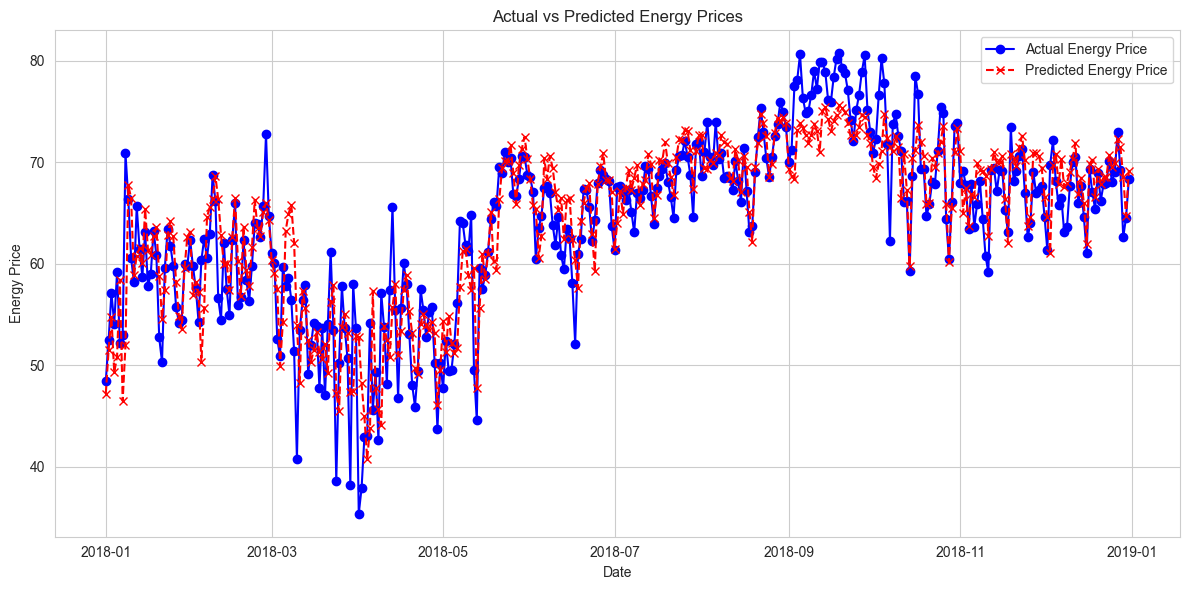

In [109]:
plot_predictions_actual()

# If there is no flexible date (before which we train and after we predict

# Split into train and test

In [110]:
# Create the train DataFrame with rows from the years 2015 to 2017
train = data[(data['date'].dt.year >= 2015) & (data['date'].dt.year <= 2017)]

# Create the test DataFrame with rows from the year 2018
test = data[data['date'].dt.year == 2018]

KeyError: 'date'

In [ ]:
train.shape

In [ ]:
test.shape

# Assign X and y for train and test each

In [ ]:
X_train = train.drop(columns=["price actual", "time", "Unnamed: 0"])
y_train = train["price actual"]

In [ ]:
X_test = test.drop(columns=["price actual", "time", "Unnamed: 0"])
y_test = test["price actual"]

In [ ]:
X_train.head(20)

In [ ]:
y_train.head()

# Initialize and train the model

In [ ]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)